In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np 
import pickle

In [4]:
tokenizer = Tokenizer()

data = open('dataset_small.txt').read()

corpus = data.lower().split("<eos>")

#print(corpus)

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)
#print(total_words)
token_path = "./sonnet_model/data/tokenizer.pkl"
with open(token_path, "wb") as fp:
    pickle.dump(tokenizer, fp)

In [5]:
input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

15


In [4]:
print(xs[6])

[   0    0    0    0    0    0    0  104  105  684   55 1918   32    7]


In [5]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [6]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0  104  105  684   55 1918   32]
[0. 0. 0. ... 0. 0. 0.]


In [6]:
# print(tokenizer.word_index)
total_words

7228

In [8]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

In [9]:
history = model.fit(xs, ys, epochs=100, verbose=1)
print(model)

Epoch 1/100
1109/1109 [==============================] - 49s 44ms/step - loss: 7.3385 - accuracy: 0.0553
Epoch 2/100
1109/1109 [==============================] - 49s 44ms/step - loss: 6.6075 - accuracy: 0.0745
Epoch 3/100
1109/1109 [==============================] - 49s 44ms/step - loss: 5.8573 - accuracy: 0.0950
Epoch 4/100
1109/1109 [==============================] - 49s 44ms/step - loss: 4.9614 - accuracy: 0.1417
Epoch 5/100
1109/1109 [==============================] - 49s 44ms/step - loss: 4.1825 - accuracy: 0.2109
Epoch 6/100
1109/1109 [==============================] - 50s 46ms/step - loss: 3.6250 - accuracy: 0.2772
Epoch 7/100
1109/1109 [==============================] - 52s 47ms/step - loss: 3.2289 - accuracy: 0.3293
Epoch 8/100
1109/1109 [==============================] - 53s 48ms/step - loss: 2.9617 - accuracy: 0.3714
Epoch 9/100
1109/1109 [==============================] - 50s 45ms/step - loss: 2.7640 - accuracy: 0.4015
Epoch 10/100
1109/1109 [==============================]

In [10]:
model_path = "./sonnet_model/sonnet-model.hdf5"
model.save_weights(model_path)

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

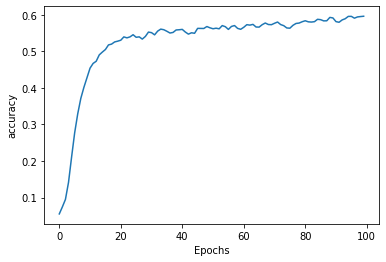

In [19]:
plot_graphs(history, 'accuracy')


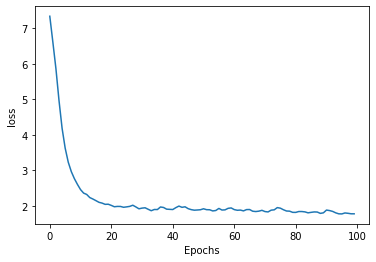

In [25]:
keys = ['accuracy', 'loss', 'val_accuracy', 'val_loss']
plot_graphs(history, 'loss')

In [24]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 14, 100)           722800    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               301200    
_________________________________________________________________
dense (Dense)                (None, 7228)              2175628   
Total params: 3,199,628
Trainable params: 3,199,628
Non-trainable params: 0
_________________________________________________________________


In [13]:
#seed_text = input("Enter the seed sentence\n")


In [14]:
#print(seed_text);

In [1]:
# estimating 7 words per line => 7*13 = 91
seed_text = "The sky is bright and blue"
next_words = 91
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word


NameError: name 'tokenizer' is not defined

In [16]:
print(seed_text)

The sky is bright and blue a pleasing pain the father of the elm tree bough drew he fear of deadly other friends displayed fear thy continual haste of those in thy mind thy matchless away on cupid of love do bless è d cheek and thy love in you 's ruthless gale of whose unappeased conduct the lays more fear spear 'd e'en around tranquillity watch she made you woods waste of wings of man of wealth believed bosom and let in vain from me thy flame though others to judge whilst many from my passion


In [17]:
seed_text = seed_text.split(" ")

In [18]:
i=0
for word in seed_text: 
    if i%7 == 0:
        print()
    if i%28==0:
        print()
    print(word, end = " ") 
    i = i+1
    



The sky is bright and blue a 
pleasing pain the father of the elm 
tree bough drew he fear of deadly 
other friends displayed fear thy continual haste 

of those in thy mind thy matchless 
away on cupid of love do bless 
è d cheek and thy love in 
you 's ruthless gale of whose unappeased 

conduct the lays more fear spear 'd 
e'en around tranquillity watch she made you 
woods waste of wings of man of 
wealth believed bosom and let in vain 

from me thy flame though others to 
judge whilst many from my passion 